<h1 align='center'>Final Project Purwadhika</h1>
<h1 align='center'>Telco Customer Churn Rate</h1>
<h4 align='center'>By Marsha Alexandra</h4>
<img src='customerchurn.jpeg'>



### Background
Customer churn refers to when customers (e.g. subscribers, users, players etc.) stop using certain company product or service. Companies typically label a customer as churned when a particular amount of time has elapsed since the customer’s last interaction with the site or service. In the telecom industry, the customers are labelled churned when they actively switch from one operator to another. Telecommucation companies experiences a wide range of 10-67% annual customer churn rate. This industry is highly competitive due to convenient nature of the service, allowing customers to choose and switch from multiple service providers and other probable factors such as better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.


### Goal
In a highly competitive market, increasing retention period of customers is a considerable concern within the telecommunication companies. The customer churn would require costs for lost revenue, marketing costs for attracting new potential customers, and additional costs for replacing the churned customers with the new ones. Therefore, predicting the customers who are likely to stop using the service will represent potentially large additional revenue source if it is done in the early phase. Thus it is an imperative need to create predictive machine learning model that could correctly predict the churned customer. The goals of exploration and machine learning model for this dataset are:
 1. To determine factors that accounts to customer churn 
 2. To predict if an individual customer will churn or not


### Dataset Columns Explanation
The dataset I choose contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.
#### Demographics:
- **customerID**: A unique ID that identifies each customer.
- **gender**: The customer’s gender (Male, Female).
- **SeniorCitizen**: Indicates if the customer is 65 or older (0 = No, 1 = Yes).
- **Partner**: Indicates if the customer has partner (Yes, No).
- **Dependents**: Indicates if the customer lives with any dependents (Yes, No). Dependents could be children, parents, grandparents, etc.

#### Services:
- **tenure** : Indicates the total amount of months that the customer has been with the company by the end of the quarter.
- **PhoneService** : Indicates if the customer subscribes to home phone service with the company (Yes, No).
- **MultipleLines** : Indicates if the customer subscribes to multiple telephone lines with the company (Yes, No, No phone service).
- **InternetService**	: Indicates if the customer subscribes to Internet service with the company (No, DSL, Fiber optic).
- **OnlineSecurity**: Indicates if the customer subscribes to an additional online security service provided by the company (Yes, No, No internet service).
- **OnlineBackup**: Indicates if the customer subscribes to an additional online backup service provided by the company (Yes, No, No internet service).
- **DeviceProtection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company (Yes, No, No internet service).
- **TechSupport**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times (Yes, No, No internet service).
- **StreamingTV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider (Yes, No, No internet service). The company does not charge an additional fee for this service.
- **StreamingMovies**: Indicates if the customer uses their Internet service to stream movies from a third party provider (Yes, No, No internet service). The company does not charge an additional fee for this service.
- **Contract**: Indicates the customer’s current contract type (Month-to-month, One year, Two year).
- **PaperlessBilling** : Indicates if the customer has chosen paperless billing (Yes, No).
- **PaymentMethod**: Indicates how the customer pays their bill (Electronic check, Mailed check, Bank transfer, Credit card).
- **MonthlyCharges**: Indicates the customer’s current total monthly charge for all their services from the company.
- **TotalCharges**: Indicates the customer’s total charges, calculated to the end of the quarter.

#### Status:
- **Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company.


In [1]:
# ------------------------------ Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from google.colab import drive # import csv data from gdrive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, plot_precision_recall_curve, roc_auc_score, plot_roc_curve, auc, roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
warnings.filterwarnings('ignore')

## Data Cleaning and Preprocessing

In [2]:
# Import Dataset
df = pd.read_csv('telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Renaming some columns for better execution in subsequent analysis and machine learning building
df.rename(columns={"customerID": "CustomerID", "gender": "Gender","tenure": "Tenure"}, inplace = True)

#Changing type of TotalCharges and Tenure to float
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce')
df["Tenure"] = df['Tenure'].astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking Outliers

In [5]:
numerical_feat = ['Tenure','MonthlyCharges','TotalCharges']
df_num = df[numerical_feat]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print('Nilai Q1:\n' + str(Q1))
print('Nilai Q3:\n' + str(Q3))
print('Nilai IQR:\n' + str(IQR))

Nilai Q1:
Tenure              9.00
MonthlyCharges     35.50
TotalCharges      401.45
Name: 0.25, dtype: float64
Nilai Q3:
Tenure              55.0000
MonthlyCharges      89.8500
TotalCharges      3794.7375
Name: 0.75, dtype: float64
Nilai IQR:
Tenure              46.0000
MonthlyCharges      54.3500
TotalCharges      3393.2875
dtype: float64


In [6]:
((df_num < (Q1 - (1.5*IQR)))|(df_num > (Q3 + (1.5*IQR)))).any()

Tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

> No outlier detected on numerical features. We can use Standard Scaler for scalling the numerical features as Standard Scaler is sensitive to outliers.

### Data Cleaning - Missing Value Treatment

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   Tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Data Preprocessing

Preprocessing Scheme:

1. Column removed:
    - CustomerID: not relevant to machine learning model building
2. OneHot Encoding, done in categorical features which have 2-3 non-ordinal values:
    - Gender
    - Partner
    - Dependents
    - PhoneService
    - MultipleLines
    - InternetService
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
    - Contract
    - PaymentMethod
    - PaperlessBilling
3. Label Encoding, done in target column which have Yes and No values. The values are transformed to binary integers to make it readable for machine learning model to process.
    - Churn
4. StandardScaling, done in numerical features:
    - Tenure
    - MonthlyCharges
    - TotalCharges
5. Passthrough:
    - SeniorCitizen

In [8]:
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

In [9]:
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first'),['Gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','PaperlessBilling']),
    ('scalling', StandardScaler(),['Tenure','MonthlyCharges','TotalCharges'])
], remainder = 'passthrough')

In [10]:
transformer.fit_transform(df)

array([[0.0, 1.0, 0.0, ..., '7590-VHVEG', 0, 0],
       [1.0, 0.0, 0.0, ..., '5575-GNVDE', 0, 0],
       [1.0, 0.0, 0.0, ..., '3668-QPYBK', 0, 1],
       ...,
       [0.0, 1.0, 1.0, ..., '4801-JZAZL', 0, 0],
       [1.0, 1.0, 0.0, ..., '8361-LTMKD', 1, 1],
       [1.0, 0.0, 0.0, ..., '3186-AJIEK', 0, 0]], dtype=object)

### Data Splitting

In [11]:
x = df.drop(columns=['CustomerID','Churn'])
y = df['Churn']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

## Model Selection

Several models will be used for predicting binary classification:
   - Logistic Regression: fast and linear algorithm for predicting the probability of an instance belonging to the default class (0 and 1 classification), assuming a linear relationship between the input variables and the output variables.
   - KNN: simple classification algorithm that stores all available classes and classifies the class based on a similarity measure.
   - Decision Tree: algorithm that uses tree representation to identify the most significant variables in which each node represents an attribute and each leaf corresponds to a class.
   - Random Forest: algorithm that combines several Decision Trees with bootstrap aggregation to make a more accurate ensemble model 
   - Extreme Gradient Boosting: an optimized version of gradient boosting, an ensemble model from numerous regression trees as weak learners, with each new tree focusing on the errors of the previous tree.

### Model Benchmark

In [13]:
models = [
    ['Log Regression', LogisticRegression(max_iter=10000)], 
    ['Decision Tree', DecisionTreeClassifier(max_depth=3, random_state=42)], 
    ['K Neighbors', KNeighborsClassifier(n_neighbors=2)],
    ['Random Forest', RandomForestClassifier(max_depth = 3, n_estimators = 20, max_features = 4)],
    ['XGB Classifier', XGBClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 42)]]

### Model Metric Evaluation

In this dataset, there are errors where the actual class contradicts with the predicted class:
1. False Positives (FP) – When actual class is no and predicted class is yes. In this case, if actual class indicates a certain customer did not churn but predicted class tells that the customer churn.
2. False Negatives (FN) – When actual class is yes but predicted class in no. In this case, if actual class value indicates that a certain customer churn and predicted class tells that the customer did not churn.

The effect of false positive would cause the company to monitor the customers and create more aggresive marketing and promotion deals to attract customers who are predicted to churn. However, false negative would cost much more revenue loss as we fail to predict the actual churned customers. Analyzing this dataset from the business perspective, customer churn is a major problem and one of the most important concerns for telco companies. As mentioned above, customer churn would require costs for lost revenue, marketing costs for attracting new potential customers, and additional costs for replacing the churned customers with the new ones. It is estimated the cost to acquire a new customer would be 5-10 times higher than to retain an existing one. Taking return on investment (RoI) into account, customer retention is more profitable than customer acquisition. Therefore, accurately predicting the churned customer is essential. I choose to reduce False negative values and the metric evaluation needed in this case is recall.  Recall, also known as sensitivity and the True Positive Rate refers to how well the model classifies true values. Lower false negative values would mean higher recall score.

In [14]:
skfold = StratifiedKFold(n_splits = 5)

def evaluate (models):

    model_name=[]
    scores=[]
    score_std=[]
    for name, model in models:
        model = model
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(estimator,x_train,y_train,scoring='recall',cv=skfold).mean()
        std= cross_val_score(estimator,x_train,y_train,scoring='recall',cv=skfold).std()
        scores.append(score)
        score_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'score':scores, 'score_std':score_std})

In [15]:
evaluate(models)

[13:36:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

,Name,score,score_std
0,Log Regression,0.548919,0.010383
1,Decision Tree,0.335585,0.041744
2,K Neighbors,0.306566,0.018646
3,Random Forest,0.302021,0.024120
4,XGB Classifier,0.526013,0.031373


In [16]:
def recall (models):

    model_name=[]
    recall_scores=[]
    score_std=[]
    for name, model in models:
        model = model
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', model)])

        estimator.fit(x_train,y_train)
        y_pred = estimator.predict(x_test)
        recall = recall_score(y_test, y_pred)
        recall_scores.append(recall)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'Recall score':recall_scores})

In [17]:
recall(models)

[13:36:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Name,Recall score
0,Log Regression,0.566845
1,Decision Tree,0.320856
2,K Neighbors,0.304813
3,Random Forest,0.162210
4,XGB Classifier,0.499109


>From the cross validation and recall score, model with the best performance is Logistic Regression. Logistic Regression also has the smallest standard deviation score. However, the models were evaluated in imbalance dataset, resulting in moderate recall score (0.56). Therefore, the imbalanced dataset will be treated with resampling & algorithm-based methods and all the models will be re-evaluated. 

### Imbalance Dataset Handling

#### Resampling Method

In [18]:
#Resampling Method Used
smote = SMOTE(random_state=42)
nearmiss = NearMiss()

In [19]:
#Model Benchmark
logreg = LogisticRegression(max_iter=10000)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=2)
rf = RandomForestClassifier(max_depth = 3, n_estimators = 20, max_features = 4)
xgb = XGBClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 42)

In [20]:
estimator_balance = Pipeline([('transformer', transformer), ('balancing', smote), ('model', logreg)])

In [21]:
hyperparam_space={'balancing':[smote,nearmiss],
                 'model':[logreg,tree,knn,rf,xgb]}

grid_search= GridSearchCV(estimator_balance,
    param_grid= hyperparam_space,
    cv=skfold,
    n_jobs=-1,
    scoring='recall')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'Internet

In [22]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balancing,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.234192,0.074414,0.023047,0.004774,SMOTE(random_state=42),LogisticRegression(max_iter=10000),"{'balancing': SMOTE(random_state=42), 'model':...",0.759542,0.832061,0.839695,0.793103,0.766284,0.798137,0.032886,4
1,0.138323,0.021503,0.025237,0.003056,SMOTE(random_state=42),"DecisionTreeClassifier(max_depth=3, random_sta...","{'balancing': SMOTE(random_state=42), 'model':...",0.877863,0.874046,0.904580,0.915709,0.858238,0.886087,0.021013,2
2,0.188576,0.035267,0.335159,0.023353,SMOTE(random_state=42),KNeighborsClassifier(n_neighbors=2),"{'balancing': SMOTE(random_state=42), 'model':...",0.469466,0.461832,0.503817,0.478927,0.463602,0.475529,0.015352,9
3,0.339330,0.058412,0.024205,0.002830,SMOTE(random_state=42),"RandomForestClassifier(max_depth=3, max_featur...","{'balancing': SMOTE(random_state=42), 'model':...",0.748092,0.812977,0.828244,0.804598,0.750958,0.788974,0.033103,5
4,4.014078,0.469012,0.035027,0.006438,SMOTE(random_state=42),"XGBClassifier(base_score=None, booster=None, c...","{'balancing': SMOTE(random_state=42), 'model':...",0.583969,0.652672,0.637405,0.681992,0.651341,0.641476,0.032211,8
5,0.596911,0.114650,0.026338,0.004108,NearMiss(),LogisticRegression(max_iter=10000),"{'balancing': NearMiss(), 'model': LogisticReg...",0.797710,0.793893,0.790076,0.781609,0.754789,0.783616,0.015369,6
6,0.226606,0.048906,0.041726,0.015942,NearMiss(),"DecisionTreeClassifier(max_depth=3, random_sta...","{'balancing': NearMiss(), 'model': DecisionTre...",0.912214,0.954198,0.702290,0.911877,0.892720,0.874660,0.088498,3
7,0.275765,0.013641,0.177109,0.050302,NearMiss(),KNeighborsClassifier(n_neighbors=2),"{'balancing': NearMiss(), 'model': KNeighborsC...",0.408397,0.370229,0.332061,0.394636,0.352490,0.371563,0.027623,10
8,0.266351,0.031578,0.027854,0.001808,NearMiss(),"RandomForestClassifier(max_depth=3, max_featur...","{'balancing': NearMiss(), 'model': RandomFores...",0.931298,0.946565,0.950382,0.923372,0.915709,0.933465,0.013264,1
9,1.658244,0.434949,0.026380,0.004568,NearMiss(),"XGBClassifier(base_score=None, booster=None, c...","{'balancing': NearMiss(), 'model': XGBClassifi...",0.744275,0.820611,0.729008,0.747126,0.777778,0.763759,0.032535,7


In [23]:
print('Best score: ',grid_search.best_score_)
print('Best model: ',grid_search.best_params_)

Best score:  0.9334649469158551
Best model:  {'balancing': NearMiss(), 'model': RandomForestClassifier(max_depth=3, max_features=4, n_estimators=20)}


#### Algorithm-Based Method

In [24]:
algo = [
    ['Log Regression', LogisticRegression(max_iter=10000, class_weight='balanced')],
    ['DecisionTree', DecisionTreeClassifier(max_depth=3,random_state=42, class_weight='balanced')],
    ['Random Forest', RandomForestClassifier(max_depth = 3, n_estimators = 20, max_features = 4, class_weight='balanced')]
]

In [25]:
evaluate(algo)

,Name,score,score_std
0,Log Regression,0.810365,0.032113
1,DecisionTree,0.886087,0.021013
2,Random Forest,0.808090,0.028647


>Model cross validation using imbalance dataset handling cause the score in most of the models goes up significantly. Before imbalance data handling, the cross validation score in the models are around 0.3 - 0.5. After imbalance data handling, the score in most of the models are around 0.7 - 0.9. From both resampling and algorithm-based methods, model with the best performance score with lowest standard deviation score observed is RandomForest with resampling NearMiss method (0.93). Therefore, the model chosen for this dataset is RandomForest with resampling NearMiss method.

## Hyperparameter Tuning

In [27]:
#Model
rf = RandomForestClassifier(max_depth = 3, n_estimators = 20, max_features = 4)
nearmiss = NearMiss()
estimator_balance = Pipeline([('transformer', transformer), ('balancing', nearmiss), ('model', rf)])

Parameters used in hyperparameter tuning: 
1. Near Miss Parameter:
   - n_neighbors : size of the neighbourhood to consider to compute the average distance to the minority point samples.
2. Random Forest Parameter:
   - n_estimators: the number of trees in the forest.
   - max_features: the number of features to consider when looking for the best split. If “auto”, then max_features = sqrt(n_features).
   - max_depth: the maximum depth of the tree.
   - criterion: the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
   - bootstrap: whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

In [28]:
hyperparam_space = {
    'balancing__n_neighbors': [2,5,10,15,20],
    'model__n_estimators' : [10,20,100,200],
    'model__max_depth' : np.arange(3,13,2),
    'model__max_features' : ['auto',2,4,6,8],
    'model__criterion': ['gini','entropy'],
    'model__bootstrap': [True,False]
}

In [29]:
skfold = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(
    estimator_balance,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='recall',
    n_jobs=-1
)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'Internet

In [30]:
print('Best Score: {}'.format(grid_search.best_score_))
print('Best Param: {}'.format(grid_search.best_params_))

Best Score: 0.9449475008043052
Best Param: {'balancing__n_neighbors': 15, 'model__bootstrap': False, 'model__criterion': 'entropy', 'model__max_depth': 3, 'model__max_features': 'auto', 'model__n_estimators': 10}


### Before Tuning

In [102]:
#Model
rf = RandomForestClassifier(max_depth = 3, n_estimators = 20, max_features = 4)
nearmiss = NearMiss()
estimator_balance = Pipeline([('transformer', transformer), ('balancing', nearmiss), ('model', rf)])

In [103]:
estimator_balance.fit(x_train,y_train)
y_pred = estimator_balance.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.31      0.46      1549
           1       0.33      0.93      0.48       561

    accuracy                           0.47      2110
   macro avg       0.62      0.62      0.47      2110
weighted avg       0.76      0.47      0.47      2110



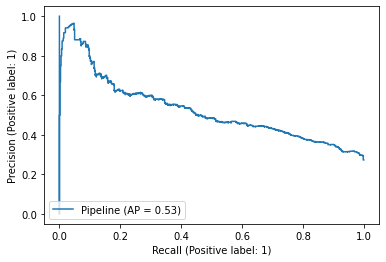

In [104]:
plot_precision_recall_curve(estimator_balance,x_test,y_test)

tn :  481  fp :  1068  fn :  42  tp :  519


<AxesSubplot:>

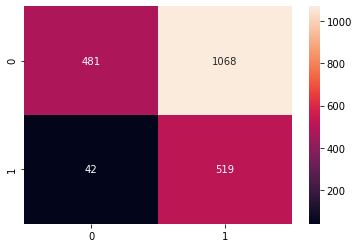

In [105]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### After Tuning

In [35]:
grid_search.best_estimator_.fit(x_train, y_train)
y_pred = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.26      0.41      1549
           1       0.31      0.93      0.47       561

    accuracy                           0.44      2110
   macro avg       0.61      0.60      0.44      2110
weighted avg       0.75      0.44      0.42      2110



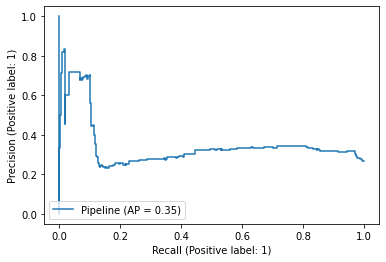

In [36]:
plot_precision_recall_curve(grid_search.best_estimator_,x_test,y_test)

tn :  407  fp :  1142  fn :  39  tp :  522


<AxesSubplot:>

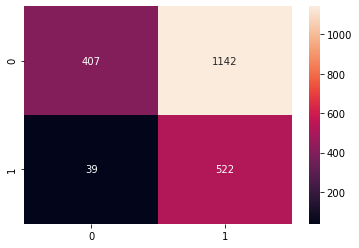

In [101]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

>The recall score itself is already high before hyperparameter tuning. After tuning, the recall score is slightly higher. Looking at the precision-recall curve, hyperparameter tuning lower the weighted-average precision score (AP), making the trade-off of precision and recall extremely high. In this model, we could not find a threshold that satisfy both high precision and recall score. However, my main objective is to correctly detect churned customers therefore I focus only on the high recall score. The confusion matrix results above show that false negative numbers are lower after hyperparameter tuning. Therefore, I chose the model after hyperparameter tuning as the final machine learning model.

### Feature Importance
I run feature importance on the model to check which features matter the most in predicting churn rate in the model.

In [49]:
features = list(grid_search.best_estimator_[0].transformers_[0][1].get_feature_names())  + ['SeniorCitizen','Tenure','MonthlyCharges','TotalCharges']

In [50]:
importance_tab = pd.DataFrame(grid_search.best_estimator_[2].feature_importances_, columns = ['imp'],index = features)

importance_tab.sort_values(by = 'imp', ascending = False)

,imp
x7_No internet service,0.239564
x8_No internet service,0.198718
x11_No internet service,0.087533
x10_No internet service,0.081837
x6_No internet service,0.070701
MonthlyCharges,0.065689
SeniorCitizen,0.048486
x5_Fiber optic,0.043852
x9_No internet service,0.041292
x13_Mailed check,0.031728


<AxesSubplot:>

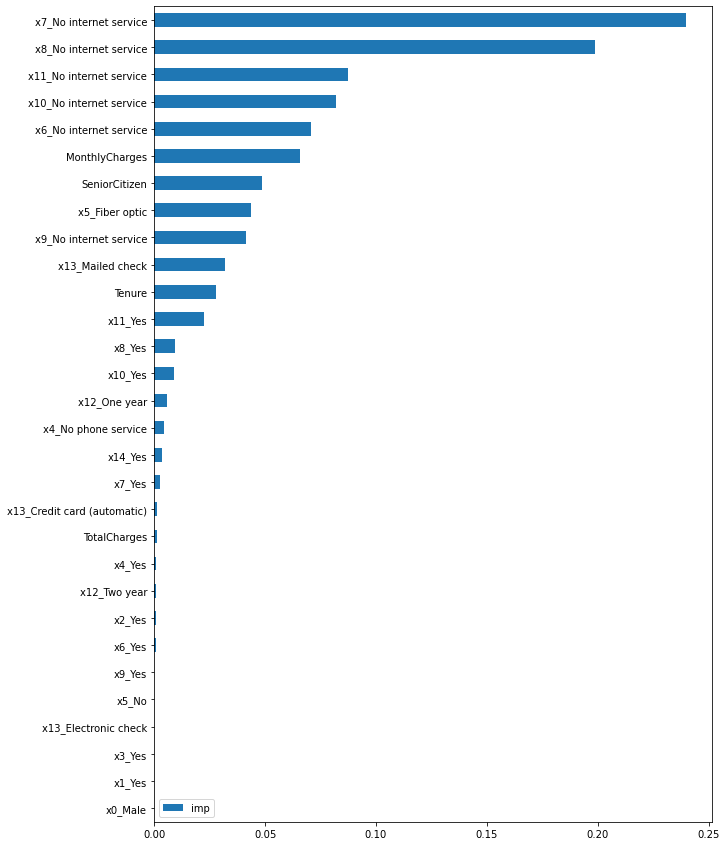

In [51]:
importance_tab.sort_values('imp').plot(kind = 'barh', figsize=(10,15))

 Note:
 - x0 = Gender
 - x1 = Partner
 - x2 = Dependents
 - x3 = PhoneService
 - x4 = MultipleLines
 - x5 = InternetService
 - x6 = OnlineSecurity
 - x7 = OnlineBackup
 - x8 = DeviceProtection
 - x9 = TechSupport
 - x10 = StreamingTV
 - x11 = StreamingMovies
 - x12 = Contract
 - x13 = PaymentMethod
 - x14 = PaperlessBilling

> The visualization above have shown that the 10 most important features in this dataset are: OnlineBackup, DeviceProtection, StreamingMovies, StreamingTV, OnlineSecurity, MonthlyCharges, SeniorCitizen, InternetService, TechSupport, and PaymentMethod. This means the features that contributes the most to predicting churn rate are mostly the additional internet services, along with monthly charges and payment method. SeniorCitizen is the demographic feature that contributes the most to predicting churn rate. Using the final model, I will fit the model with feature selection dataset which only contains 10 aforementioned features to see whether the recall score stays the same. If the score stays the same, I only need those 10 selected features for the final machine learning model. 

## Fitting Model with Dataset containing Feature Selection 
### The New Dataset

In [73]:
df2 = df.drop(columns = ['Gender','Partner','Dependents','PhoneService','MultipleLines','Contract','PaperlessBilling','TotalCharges','Tenure'] )
df2

,CustomerID,SeniorCitizen,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,DSL,No,Yes,No,No,No,No,Electronic check,29.85,0
1,5575-GNVDE,0,DSL,Yes,No,Yes,No,No,No,Mailed check,56.95,0
2,3668-QPYBK,0,DSL,Yes,Yes,No,No,No,No,Mailed check,53.85,1
3,7795-CFOCW,0,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),42.30,0
4,9237-HQITU,0,Fiber optic,No,No,No,No,No,No,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,DSL,Yes,No,Yes,Yes,Yes,Yes,Mailed check,84.80,0
7039,2234-XADUH,0,Fiber optic,No,Yes,Yes,No,Yes,Yes,Credit card (automatic),103.20,0
7040,4801-JZAZL,0,DSL,Yes,No,No,No,No,No,Electronic check,29.60,0
7041,8361-LTMKD,1,Fiber optic,No,No,No,No,No,No,Mailed check,74.40,1


### Data Splitting and Preprocessing  

In [74]:
x2 = df2.drop(columns=['CustomerID','Churn'])
y2 = df2['Churn']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, 
                                                    stratify = y2,
                                                    test_size = 0.3,
                                                    random_state = 42)

Preprocessing Scheme:

1. Column removed:
    - CustomerID: not relevant to machine learning model building
2. OneHot Encoding, done in categorical features which have 2-3 non-ordinal values:
    - InternetService
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
    - PaymentMethod
3. StandardScaling, done in numerical features:
    - MonthlyCharges
4. Passthrough:
    - SeniorCitizen

In [75]:
transformer2 = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first'),['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod']),
    ('scalling', StandardScaler(),['MonthlyCharges'])
], remainder = 'passthrough')

In [76]:
transformer2.fit_transform(df2)

array([[0.0, 0.0, 0.0, ..., '7590-VHVEG', 0, 0],
       [0.0, 0.0, 0.0, ..., '5575-GNVDE', 0, 0],
       [0.0, 0.0, 0.0, ..., '3668-QPYBK', 0, 1],
       ...,
       [0.0, 0.0, 0.0, ..., '4801-JZAZL', 0, 0],
       [1.0, 0.0, 0.0, ..., '8361-LTMKD', 1, 1],
       [1.0, 0.0, 0.0, ..., '3186-AJIEK', 0, 0]], dtype=object)

### Model Fitting and Evaluation

In [77]:
#Model with Best Hyperparameter
rf_fin = RandomForestClassifier(bootstrap = False, criterion ='entropy', max_depth = 3, max_features = 'auto', n_estimators = 10)
nearmiss_fin = NearMiss(n_neighbors = 15)
estimator_rf_fin = Pipeline([('transformer', transformer2), ('balancing', nearmiss_fin), ('model', rf_fin)])

In [78]:
estimator_rf_fin.fit(x2_train,y2_train)
y2_pred = estimator_rf_fin.predict(x2_test)
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.91      0.26      0.40      1549
           1       0.31      0.93      0.47       561

    accuracy                           0.44      2110
   macro avg       0.61      0.59      0.43      2110
weighted avg       0.75      0.44      0.42      2110



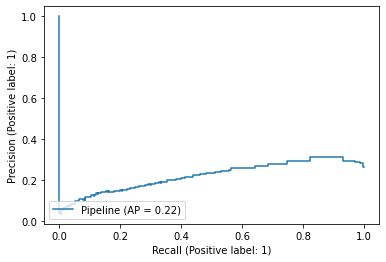

In [80]:
plot_precision_recall_curve(estimator_rf_fin,x2_test,y2_test)

>The precision recall curve shows the lowest AP score, meaning the model is totally focused for recall score only.

tn :  396  fp :  1153  fn :  38  tp :  523


<AxesSubplot:>

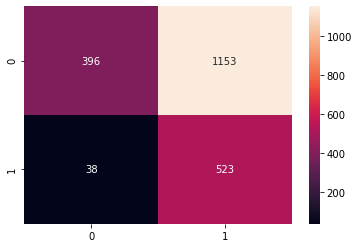

In [106]:
tn, fp, fn, tp = confusion_matrix(y2_test,y2_pred).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)
sns.heatmap(confusion_matrix(y2_test,y2_pred), annot = True, fmt = 'd')

>Fitting model with feature selection dataset results in same recall score and slightly lower false negative numbers. This proves the model stability since the model could produce the same result with reduced features. Since the model is stable with feature selecetion dataset, I will use this model & dataset and deploy them to dashboard.

## Saving Model with Pickle

In [81]:
import pickle

In [82]:
estimator_rf_fin.fit(x2,y2)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaymentMethod']),
                                                 ('scalling', StandardScaler(),
                                                  ['MonthlyCharges'])])),
                ('balancing', NearMiss(n_neighbors=15)),
                ('model',
                 RandomForestClas

In [83]:
file_name = 'final_model.sav'

pickle.dump(estimator_rf_fin, open(file_name,'wb'))

In [84]:
loaded_model = pickle.load(open(file_name,'rb'))
loaded_model.predict(x2_test)

array([0, 1, 1, ..., 1, 0, 1])

### Saving Final Dataset

In [88]:
df3 = df2.head(100)
df3

,CustomerID,SeniorCitizen,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,DSL,No,Yes,No,No,No,No,Electronic check,29.85,0
1,5575-GNVDE,0,DSL,Yes,No,Yes,No,No,No,Mailed check,56.95,0
2,3668-QPYBK,0,DSL,Yes,Yes,No,No,No,No,Mailed check,53.85,1
3,7795-CFOCW,0,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),42.30,0
4,9237-HQITU,0,Fiber optic,No,No,No,No,No,No,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,0,Fiber optic,Yes,No,No,No,No,No,Electronic check,78.95,1
96,9803-FTJCG,0,DSL,Yes,Yes,No,Yes,No,No,Credit card (automatic),66.85,0
97,0278-YXOOG,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Mailed check,21.05,1
98,3212-KXOCR,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Bank transfer (automatic),21.00,0


In [87]:
df3.to_csv('df_telco.csv')

In [89]:
df2.describe()

,SeniorCitizen,MonthlyCharges,Churn
count,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,0.265785
std,0.368844,30.085974,0.441782
min,0.000000,18.250000,0.000000
25%,0.000000,35.587500,0.000000
50%,0.000000,70.350000,0.000000
75%,0.000000,89.862500,1.000000
max,1.000000,118.750000,1.000000
